
___
# Linear Regression 

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! 



## Imports
** Importing pandas, numpy, matplotlib,and seaborn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

I will work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Reading in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers=pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

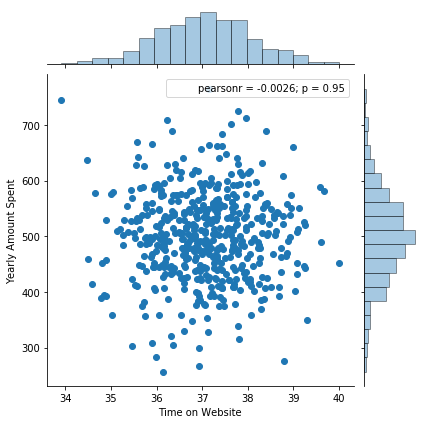

In [7]:
plt.rcParams["patch.force_edgecolor"] = True
sns.jointplot(customers['Time on Website'], customers['Yearly Amount Spent'], data=customers)

**Using seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent columns.**

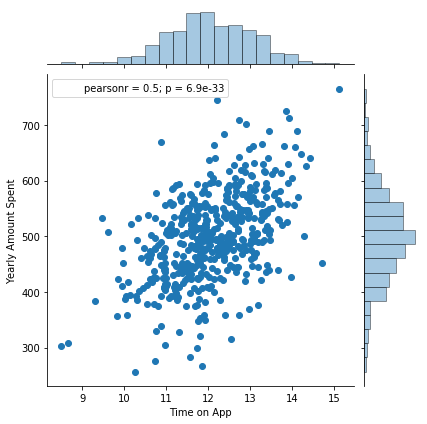

In [8]:
sns.jointplot(customers['Time on App'], customers['Yearly Amount Spent'], data=customers)

** Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

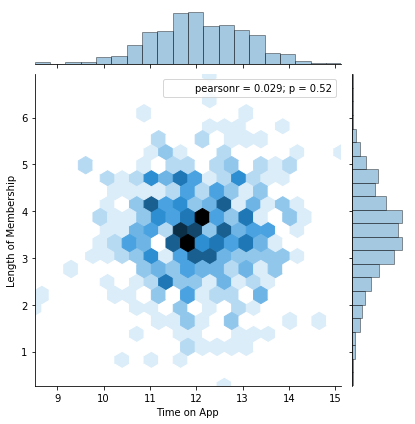

In [9]:
sns.jointplot(customers['Time on App'], customers['Length of Membership'], kind="hex")

**Exploring the relationships between variables across the entire data set. Using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to do the same.**

**Observation: There is a direct relationship between length of membership and yearly amount spent.**

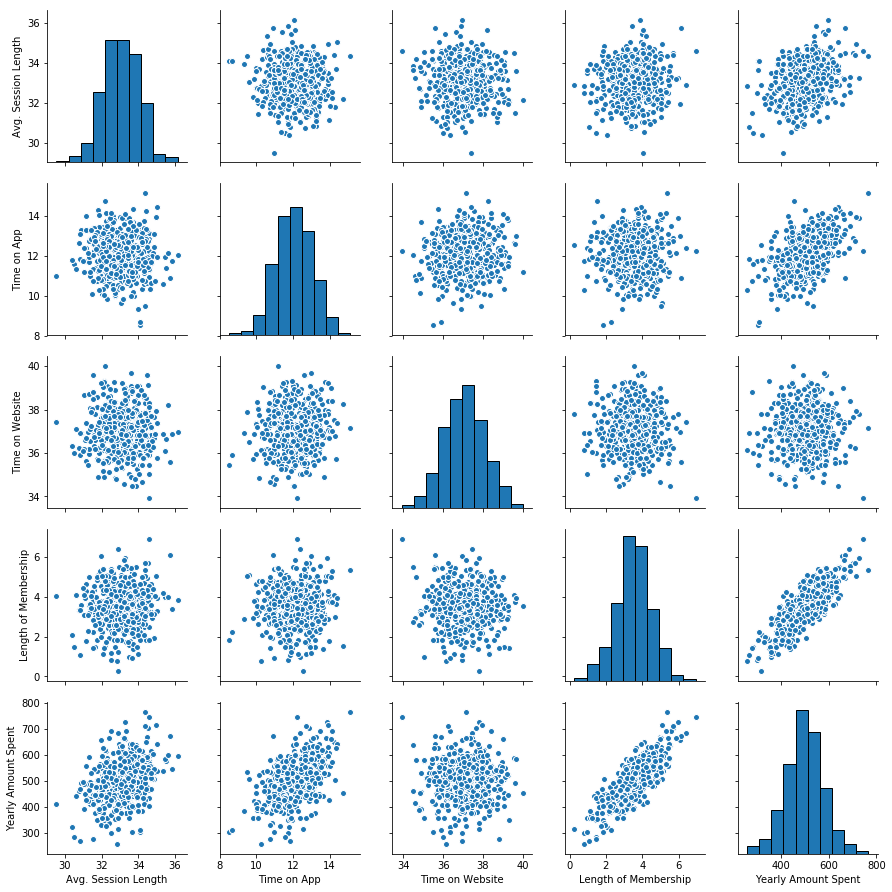

In [10]:
sns.pairplot(customers)

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

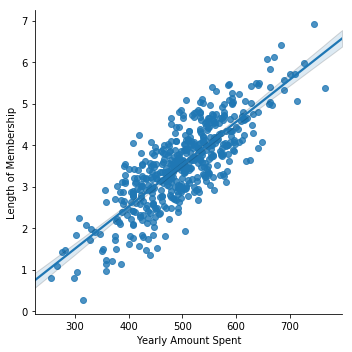

In [11]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership',data= customers)

## Training and Testing Data


** Setting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [14]:
X=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=customers['Yearly Amount Spent']

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=101)

## Training the Model


** Importing LinearRegression from sklearn.linear_model **

In [17]:
from sklearn.linear_model import LinearRegression 

**Creating an instance of a LinearRegression() model named lm.**

In [18]:
lm=LinearRegression()

** Training lm on the training data.**

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Printing out the coefficients of the model**

In [20]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

## Predicting Test Data


In [24]:
prediction=lm.predict(X_test)


** Creating a scatterplot of the real test values versus the predicted values. **

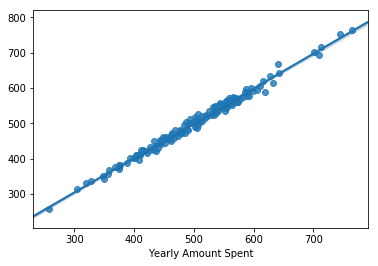

In [25]:
sns.regplot(x=y_test,y=prediction)

## Evaluating the Model

Evaluating the model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [26]:
from sklearn import metrics

In [27]:
MAE=metrics.mean_absolute_error(y_test,prediction)
MSE=metrics.mean_squared_error(y_test,prediction)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,prediction))

In [29]:
print("MAE",MAE)
print("MSE", MSE)
print("RMSE", RMSE)

MAE 7.22814865343
MSE 79.813051651
RMSE 8.93381506698


## Residuals

We have a very good model with a good fit. 

**Plotting a histogram of the residuals to make sure it looks normally distributed.**

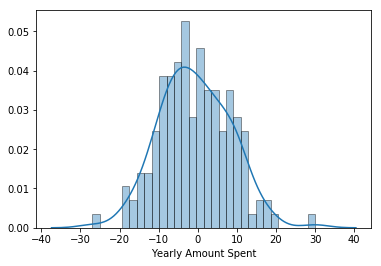

In [31]:
sns.distplot(y_test-prediction, bins=30)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [32]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** OBSERVATIONS: **

** 1) Interpreting the coefficients.
With one unit increase in the average session length, the amount spent by the customer increases by 26 units(approx.).
With one unit increase in the Time on App, the amount spent increases by 38.5 units.
With one unit increase in the Time on Website, the amount spent increases by 0.19 units.**

** 2) What business plan should be followed?**
**There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company.**